# CASE STUDY Visualizations in Python on Sales Data 

## 1. Compare Sales by region for 2016 with 2015 using bar chart

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

In [11]:
salesdata=pd.read_csv('F:\Analytix_Labs\Python for data science\Case_Study\Python Foundation Case Study 4 - Python Visualization Case Study\SalesData.csv')
print(salesdata)

      AccountId  AccountName   Region       Division        City State  Tier  \
0          1116     Account1     West    DIAMONDBACK   PHOENIX W    AZ   Low   
1          1116     Account1     West    DIAMONDBACK   PHOENIX W    AZ   Low   
2          2391     Account2     East      MINUTEMEN    HARTFORD    CT   Med   
3          2391     Account2     East      MINUTEMEN    HARTFORD    CT   Med   
4          2397     Account3     East      MINUTEMEN   WORCESTER    MA   Med   
...         ...          ...      ...            ...         ...   ...   ...   
3704       7576  Account2736     East         EMPIRE    SYRACUSE    NY   Out   
3705       4969  Account2740  Central  SOUTHERN STAR  MONTGOMERY    AL   Med   
3706       2850  Account2746     East        SYNERGY   ASHEVILLE    NC  High   
3707    1102265  Account2748     West    DIAMONDBACK  SCOTTSDALE    AZ   Out   
3708      47282  Account2750     West       CHARGERS    SAN JOSE    CA   Low   

     Month  Sales2015  Sales2016  Units

In [7]:
salesdata.dtypes

AccountId               int64
AccountName            object
Region                 object
Division               object
City                   object
State                  object
Tier                   object
Month                  object
Sales2015             float64
Sales2016             float64
Units2015             float64
Units2016             float64
TargetAchevied2015    float64
TargetAchevied2016    float64
dtype: object

In [8]:
salesdata.head

<bound method NDFrame.head of       AccountId  AccountName   Region       Division        City State  Tier  \
0          1116     Account1     West    DIAMONDBACK   PHOENIX W    AZ   Low   
1          1116     Account1     West    DIAMONDBACK   PHOENIX W    AZ   Low   
2          2391     Account2     East      MINUTEMEN    HARTFORD    CT   Med   
3          2391     Account2     East      MINUTEMEN    HARTFORD    CT   Med   
4          2397     Account3     East      MINUTEMEN   WORCESTER    MA   Med   
...         ...          ...      ...            ...         ...   ...   ...   
3704       7576  Account2736     East         EMPIRE    SYRACUSE    NY   Out   
3705       4969  Account2740  Central  SOUTHERN STAR  MONTGOMERY    AL   Med   
3706       2850  Account2746     East        SYNERGY   ASHEVILLE    NC  High   
3707    1102265  Account2748     West    DIAMONDBACK  SCOTTSDALE    AZ   Out   
3708      47282  Account2750     West       CHARGERS    SAN JOSE    CA   Low   

     Mont

In [9]:
salesdata.tail

<bound method NDFrame.tail of       AccountId  AccountName   Region       Division        City State  Tier  \
0          1116     Account1     West    DIAMONDBACK   PHOENIX W    AZ   Low   
1          1116     Account1     West    DIAMONDBACK   PHOENIX W    AZ   Low   
2          2391     Account2     East      MINUTEMEN    HARTFORD    CT   Med   
3          2391     Account2     East      MINUTEMEN    HARTFORD    CT   Med   
4          2397     Account3     East      MINUTEMEN   WORCESTER    MA   Med   
...         ...          ...      ...            ...         ...   ...   ...   
3704       7576  Account2736     East         EMPIRE    SYRACUSE    NY   Out   
3705       4969  Account2740  Central  SOUTHERN STAR  MONTGOMERY    AL   Med   
3706       2850  Account2746     East        SYNERGY   ASHEVILLE    NC  High   
3707    1102265  Account2748     West    DIAMONDBACK  SCOTTSDALE    AZ   Out   
3708      47282  Account2750     West       CHARGERS    SAN JOSE    CA   Low   

     Mont

In [12]:
salesdata.isnull().sum()

AccountId             0
AccountName           0
Region                0
Division              0
City                  0
State                 0
Tier                  0
Month                 0
Sales2015             0
Sales2016             0
Units2015             0
Units2016             0
TargetAchevied2015    0
TargetAchevied2016    0
dtype: int64

In [15]:
sales_by_region= salesdata.groupby('Region')['Sales2015','Sales2016'].sum().reset_index()
print(sales_by_region)

    Region     Sales2015     Sales2016
0  Central  7.891729e+06  9.787809e+06
1     East  9.512916e+06  1.266723e+07
2     West  5.349745e+06  7.209689e+06


<ipython-input-15-80303d9bd54b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_by_region= salesdata.groupby('Region')['Sales2015','Sales2016'].sum().reset_index()


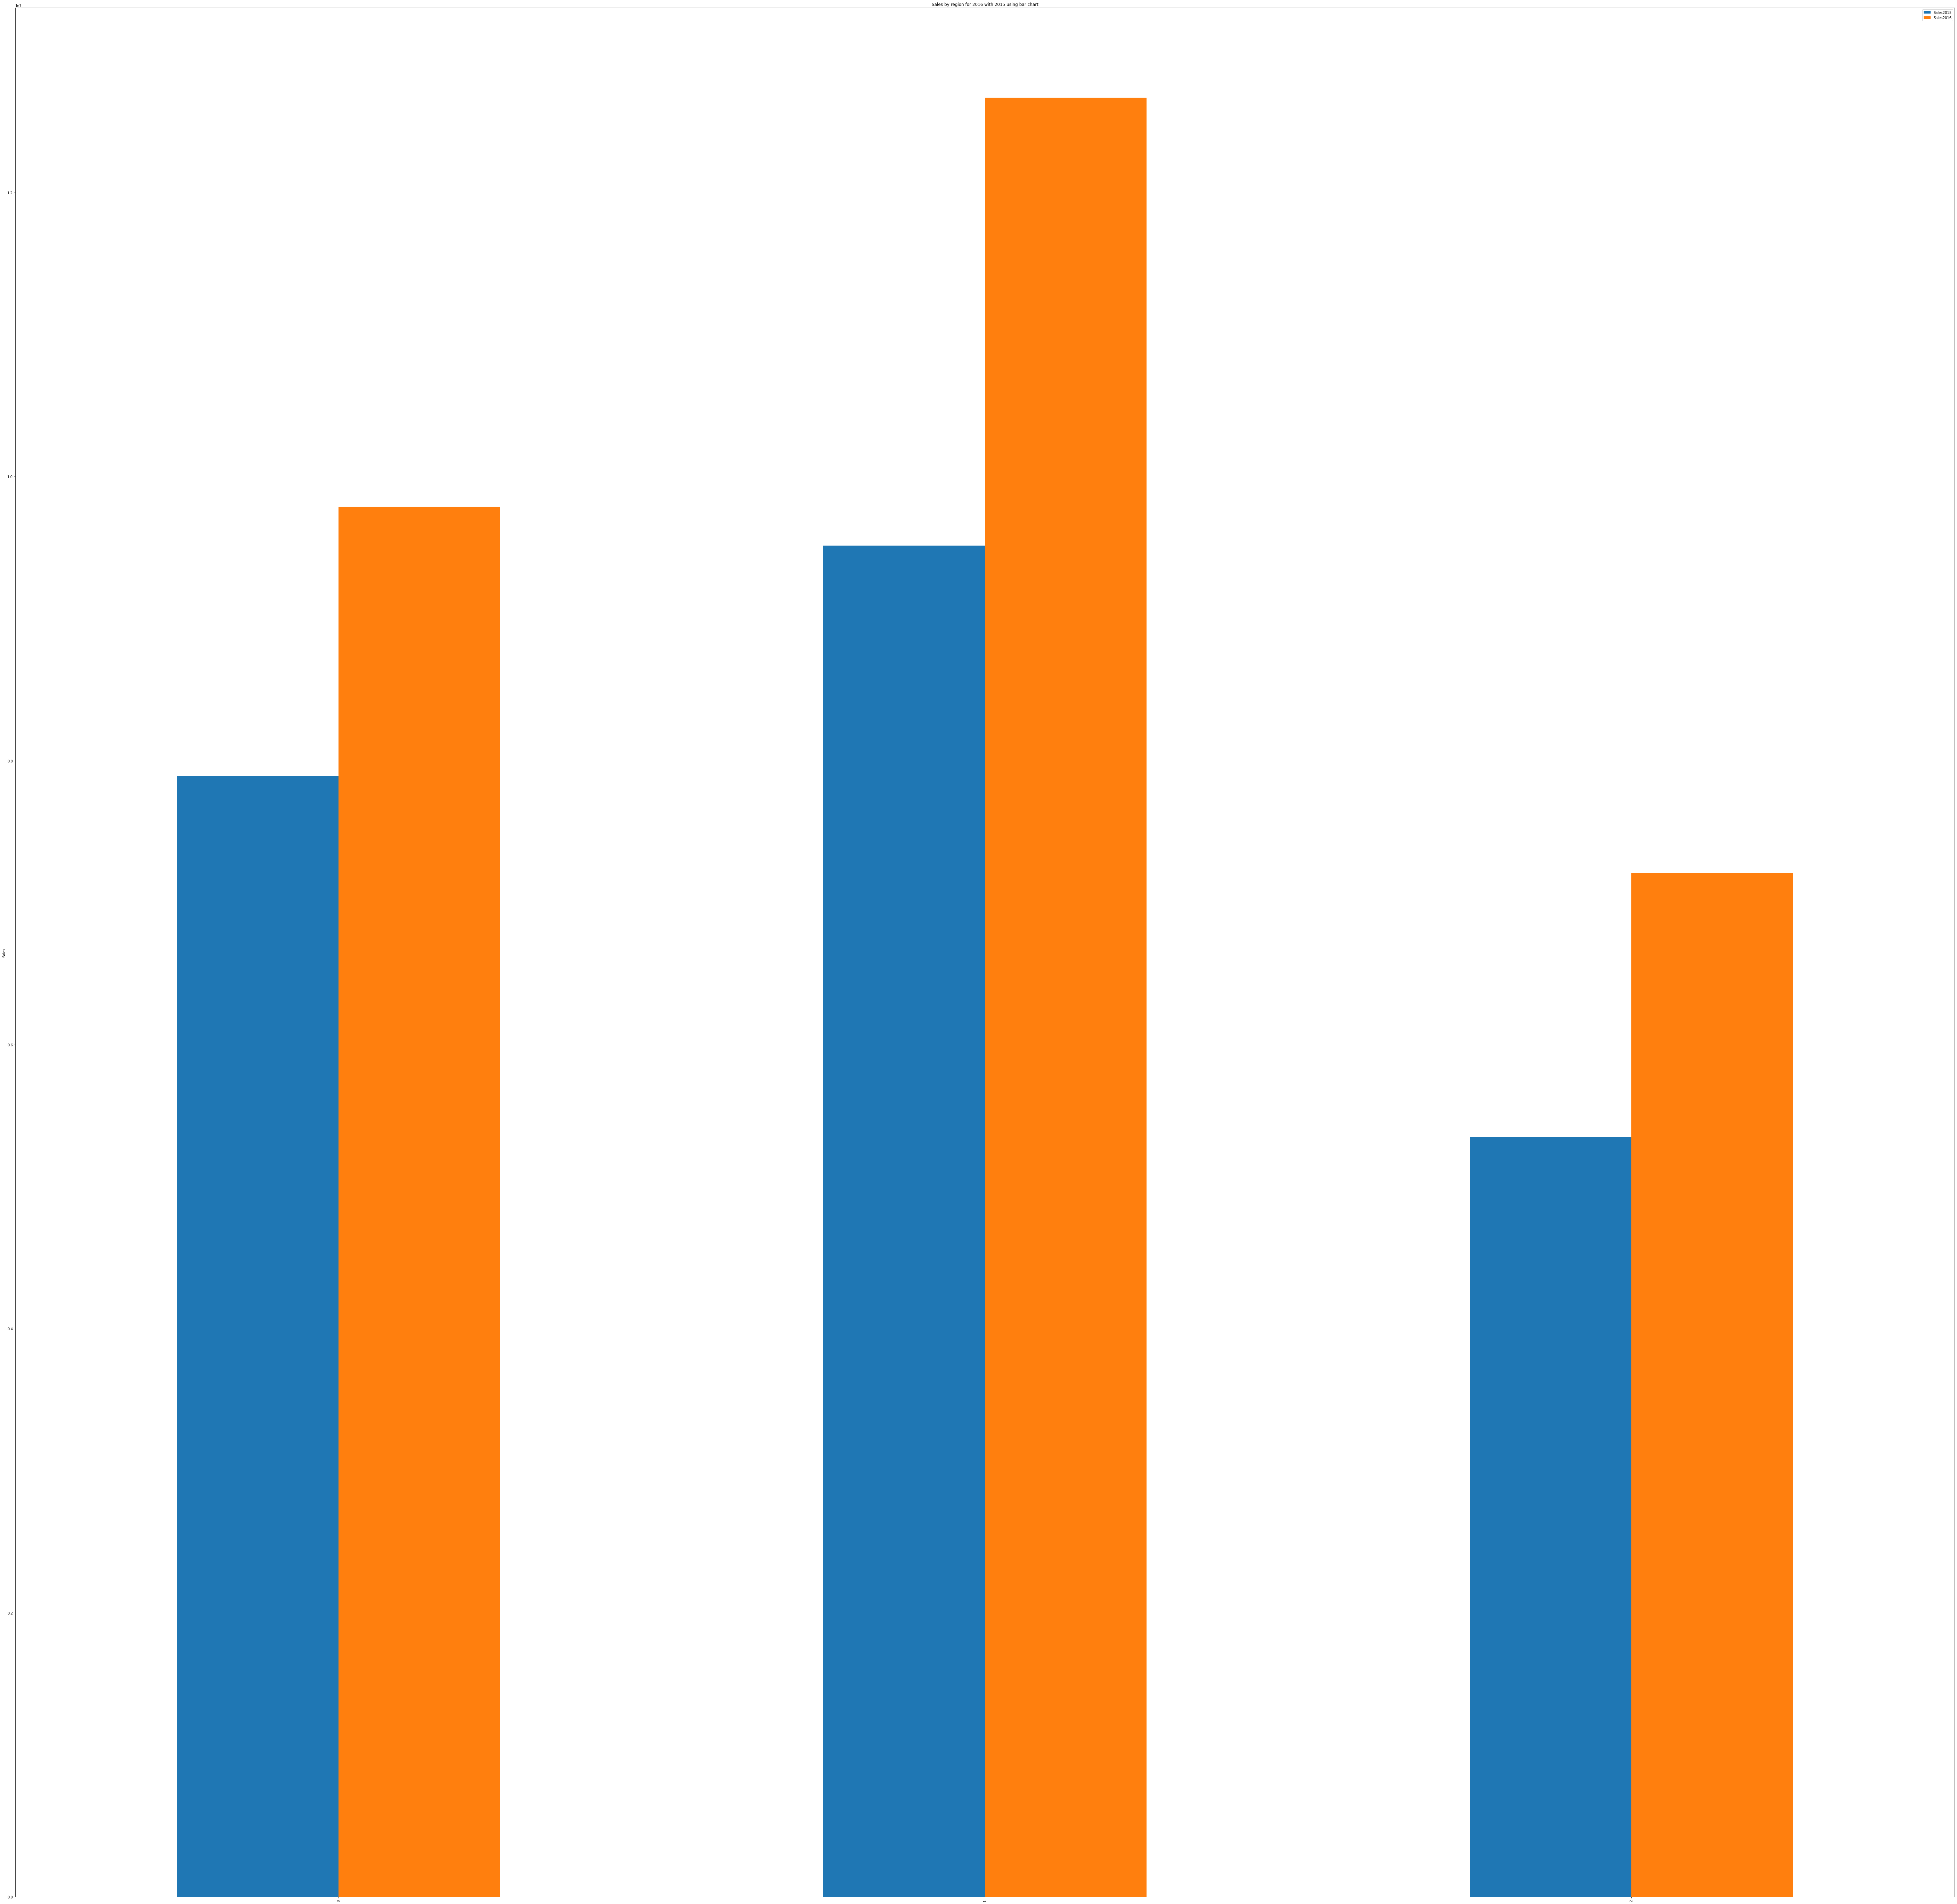

In [18]:
sales_by_region.plot(kind="bar",figsize=(100,100))
plt.ylabel('Sales')
plt.title("Sales by region for 2016 with 2015 using bar chart")
plt.show()

## 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart. 

In [27]:
pie_sales=salesdata.groupby(by="Region")[["Sales2016"]].sum().reset_index()
print(pie_sales)

    Region     Sales2016
0  Central  9.787809e+06
1     East  1.266723e+07
2     West  7.209689e+06


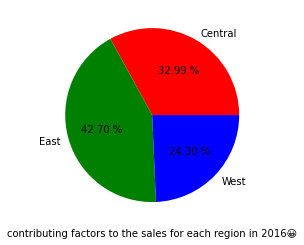

In [35]:
plt.pie(x="Sales2016",labels="Region",data=pie_sales,autopct="%.2f %%",colors=["r","g","b"])
plt.xlabel("contributing factors to the sales for each region in 2016😀")
plt.show()

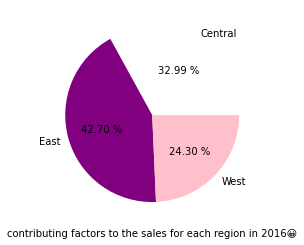

In [36]:
plt.xlabel("contributing factors to the sales for each region in 2016😀")
plt.pie(x="Sales2016",labels="Region",data=pie_sales,autopct="%.2f %%",colors=["white","purple","pink"])
plt.show()

ValueError: could not convert string to float: 'Central'

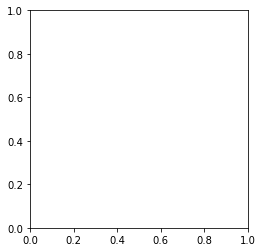

In [39]:
import matplotlib.pyplot as plt
plt.pie(sales_by_region,labels="Region",autopct='%.2f %%',shadow=True,startangle=140)
plt.axis('equal')
plt.show()

## 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers 

In [42]:
sales_region_tier=salesdata.groupby(by=["Region","Tier"]).aggregate({"Sales2015":"sum", "Sales2016":"sum"}).reset_index()
print(sales_region_tier)

     Region  Tier     Sales2015     Sales2016
0   Central  High  4.798698e+06  6.026043e+06
1   Central   Low  9.434397e+05  1.132833e+06
2   Central   Med  2.068226e+06  2.632181e+06
3   Central   Out  8.136489e+04 -3.248530e+03
4      East  High  6.102946e+06  7.817151e+06
5      East   Low  9.016658e+05  1.144930e+06
6      East   Med  2.470998e+06  3.705150e+06
7      East   Out  3.730655e+04  0.000000e+00
8      West  High  2.944789e+06  3.768038e+06
9      West   Low  6.710644e+05  1.099502e+06
10     West   Med  1.718476e+06  2.342149e+06
11     West   Out  1.541508e+04  0.000000e+00


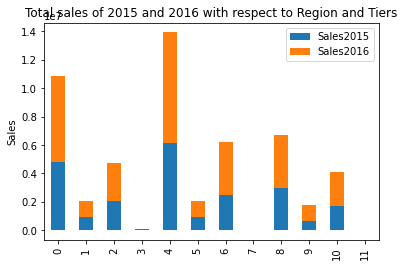

In [47]:
sales_region_tier.plot(kind="bar",stacked=True)
plt.ylabel("Sales")
plt.title("Total sales of 2015 and 2016 with respect to Region and Tiers")
plt.show()

## 4. In East region, which state registered a decline in 2016 as compared to 2015? 

In [63]:
sales_east_region=salesdata.groupby(['Region','State'])['Sales2015','Sales2016'].sum().loc['East'].reset_index()
print(sales_east_region)

   State    Sales2015   Sales2016
0     CT   197202.790   323502.31
1     DC   216723.950   257421.69
2     FL  1660162.000  2508232.28
3     GA   681546.460   946919.77
4     MA   419278.750   687096.45
5     MD   527309.060   750008.79
6     ME    77425.640   183673.05
7     NC  1292801.640  1610521.00
8     NH   136419.380   144717.51
9     NJ   520419.290   782289.19
10    NY  1725415.065  1703135.80
11    PA   785092.755   894319.49
12    RI   156311.800   162454.65
13    SC   247811.780   463414.12
14    TN    49677.000    70109.41
15    VA   819319.130  1179414.94


<ipython-input-63-5954597a9737>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_east_region=salesdata.groupby(['Region','State'])['Sales2015','Sales2016'].sum().loc['East'].reset_index()


<AxesSubplot:>

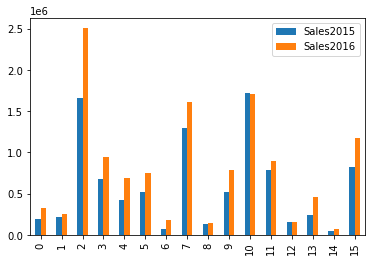

In [64]:
sales_east_region.plot(kind="bar")

## 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015? 

In [66]:
tier_sales=salesdata.groupby(["Tier","Division"])["Units2015","Units2016"].sum().loc['High'].reset_index()
print(tier_sales)

          Division  Units2015  Units2016
0        BIG APPLE   180.8330   231.0000
1         CHARGERS   123.6666   164.4999
2    CONGRESSIONAL   164.5003   205.0000
3      DIAMONDBACK   153.3334   176.6667
4           EMPIRE   414.3332   449.3332
5         GRIDIRON   213.6673   246.1675
6      GULF STREAM   185.0000   301.0009
7        HAILSTORM   187.8338   247.0003
8          KINETIC   214.3334   244.5001
9        MINUTEMEN   215.0000   267.5000
10    MUDDY WATERS   150.6666   211.5004
11          NORDIC   210.1675   225.8334
12       NORTHWEST   135.5008   163.6669
13           ORION   175.8334   276.0000
14         RACEWAY   178.3338   297.0000
15      REVOLUTION   205.8335   226.8334
16         RIPTIDE   147.5002   183.8336
17   SOUTHERN STAR   230.0000   274.1665
18        STAMPEDE   192.4999   246.8333
19         SYNERGY   322.6666   428.3334
20   THE CAROLINAS   258.8335   345.0000
21  TORNADO VALLEY   128.3331   181.0004
22         VICTORY   174.5005   221.1669
23      WAVE RID

<ipython-input-66-2be9fb62fe2d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tier_sales=salesdata.groupby(["Tier","Division"])["Units2015","Units2016"].sum().loc['High'].reset_index()


<AxesSubplot:>

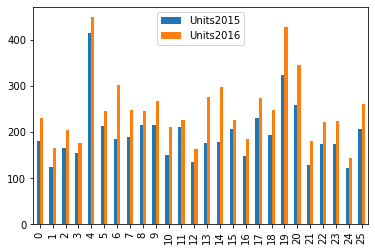

In [67]:
tier_sales.plot(kind="bar")

In [6]:
print(salesdata)

      AccountId  AccountName   Region       Division        City State  Tier  \
0          1116     Account1     West    DIAMONDBACK   PHOENIX W    AZ   Low   
1          1116     Account1     West    DIAMONDBACK   PHOENIX W    AZ   Low   
2          2391     Account2     East      MINUTEMEN    HARTFORD    CT   Med   
3          2391     Account2     East      MINUTEMEN    HARTFORD    CT   Med   
4          2397     Account3     East      MINUTEMEN   WORCESTER    MA   Med   
...         ...          ...      ...            ...         ...   ...   ...   
3704       7576  Account2736     East         EMPIRE    SYRACUSE    NY   Out   
3705       4969  Account2740  Central  SOUTHERN STAR  MONTGOMERY    AL   Med   
3706       2850  Account2746     East        SYNERGY   ASHEVILLE    NC  High   
3707    1102265  Account2748     West    DIAMONDBACK  SCOTTSDALE    AZ   Out   
3708      47282  Account2750     West       CHARGERS    SAN JOSE    CA   Low   

     Month  Sales2015  Sales2016  Units

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as - • Jan - Mar : Q1• Apr - Jun : Q2• Jul - Sep : Q3• Oct - Dec : Q4 

In [24]:
conditions = [
    (salesdata['Month'] == 'Jan')|(salesdata['Month'] == 'Feb')|(salesdata['Month']=='Mar'),
    (salesdata['Month'] == 'Apr')|(salesdata['Month'] == 'May')|(salesdata['Month']=='Jun'),
    (salesdata['Month'] == 'Jul')|(salesdata['Month'] == 'Aug')|(salesdata['Month'] == 'Sep'),
    (salesdata['Month'] == 'Oct')|(salesdata['Month'] == 'Nov')|(salesdata['Month'] == 'Dec')]
choices = ['Q1','Q2','Q3','Q4']
salesdata['Qtr'] = np.select(conditions,choices)

In [25]:
print(salesdata['Qtr'])

0       Q3
1       Q4
2       Q2
3       Q1
4       Q3
        ..
3704    Q1
3705    Q3
3706    Q4
3707    Q1
3708    Q2
Name: Qtr, Length: 3709, dtype: object


In [26]:
print(salesdata)

      AccountId  AccountName   Region       Division        City State  Tier  \
0          1116     Account1     West    DIAMONDBACK   PHOENIX W    AZ   Low   
1          1116     Account1     West    DIAMONDBACK   PHOENIX W    AZ   Low   
2          2391     Account2     East      MINUTEMEN    HARTFORD    CT   Med   
3          2391     Account2     East      MINUTEMEN    HARTFORD    CT   Med   
4          2397     Account3     East      MINUTEMEN   WORCESTER    MA   Med   
...         ...          ...      ...            ...         ...   ...   ...   
3704       7576  Account2736     East         EMPIRE    SYRACUSE    NY   Out   
3705       4969  Account2740  Central  SOUTHERN STAR  MONTGOMERY    AL   Med   
3706       2850  Account2746     East        SYNERGY   ASHEVILLE    NC  High   
3707    1102265  Account2748     West    DIAMONDBACK  SCOTTSDALE    AZ   Out   
3708      47282  Account2750     West       CHARGERS    SAN JOSE    CA   Low   

     Month  Sales2015  Sales2016  Units

In [28]:
sales_qtr = salesdata.groupby("Qtr")["Sales2015","Sales2016"].sum().reset_index()
print(sales_qtr)

  Qtr     Sales2015     Sales2016
0  Q1  5.485800e+06  6.997953e+06
1  Q2  5.390862e+06  7.237361e+06
2  Q3  6.164094e+06  7.861546e+06
3  Q4  5.713634e+06  7.567868e+06


<ipython-input-28-bd289270e29e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_qtr = salesdata.groupby("Qtr")["Sales2015","Sales2016"].sum().reset_index()


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot 

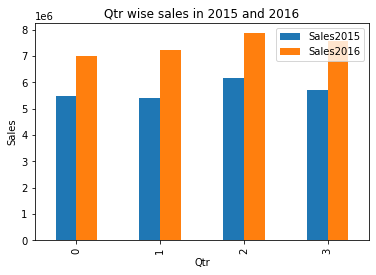

In [31]:
sales_qtr.plot(kind="bar")
plt.ylabel("Sales")
plt.xlabel("Qtr")
plt.title("Qtr wise sales in 2015 and 2016")
plt.show()

### 8.Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart. 

In [48]:
pivot_table_qtr = salesdata.groupby(["Qtr","Tier"])['Sales2016'].sum()
print(pivot_table_qtr)

Qtr  Tier
Q1   High    3.867719e+06
     Low     9.488328e+05
     Med     2.181402e+06
     Out     0.000000e+00
Q2   High    4.130953e+06
     Low     8.905948e+05
     Med     2.215814e+06
     Out     0.000000e+00
Q3   High    4.872559e+06
     Low     7.951777e+05
     Med     2.197058e+06
     Out    -3.248530e+03
Q4   High    4.740002e+06
     Low     7.426594e+05
     Med     2.085207e+06
     Out     0.000000e+00
Name: Sales2016, dtype: float64


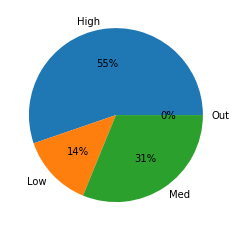

In [50]:
#Qtr Q1
plt.pie(x=pivot_table_qtr.loc["Q1",:],autopct="%1.0f%%",labels=["High","Low","Med","Out"])
plt.show()

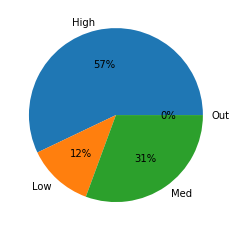

In [51]:
#Qtr Q2
plt.pie(x=pivot_table_qtr.loc["Q2",:],autopct="%1.0f%%",labels=["High","Low","Med","Out"])
plt.show()

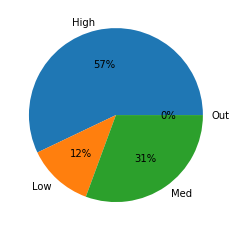

In [66]:
#Qtr Q3
plt.pie(x=pivot_table_qtr.loc["Q3",:],autopct="%1.0f%%",labels=["High","Low","Med","Out"])
plt.show()

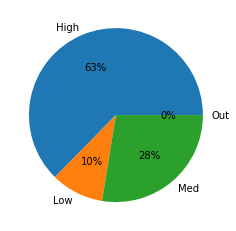

In [52]:
#Qtr Q4
plt.pie(x=pivot_table_qtr.loc["Q4",:],autopct="%1.0f%%",labels=["High","Low","Med","Out"])
plt.show()